In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('train.csv')
data.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [6]:
data.describe()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
count,38932,38932,38932,38932,38932
unique,38932,38932,11,3,2
top,id49257,The Westin is a wonderfully restored grande da...,Firefox,Desktop,happy
freq,1,1,7367,15026,26521


In [7]:
data.isnull().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

In [8]:
data.columns

Index(['User_ID', 'Description', 'Browser_Used', 'Device_Used', 'Is_Response'], dtype='object')

In [9]:
data.drop(['User_ID', 'Browser_Used', 'Device_Used'],axis=1,inplace=True)

In [10]:
data

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy
...,...,...
38927,We arrived late at night and walked in to a ch...,happy
38928,The only positive impression is location and p...,not happy
38929,Traveling with friends for shopping and a show...,not happy
38930,The experience was just ok. We paid extra for ...,not happy


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='Is_Response', ylabel='count'>

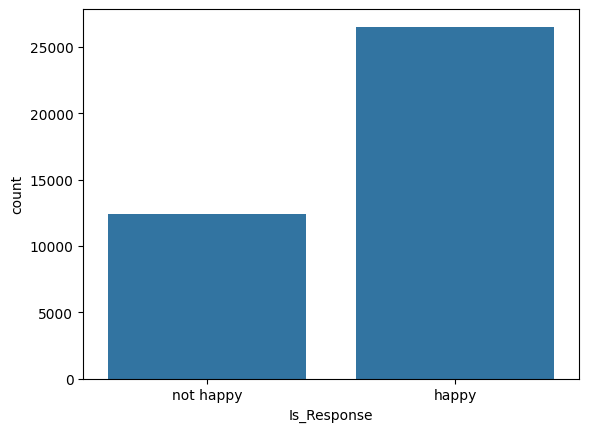

In [12]:
sns.countplot(data, x="Is_Response")

In [13]:
data.value_counts('Is_Response')

Is_Response
happy        26521
not happy    12411
Name: count, dtype: int64

In [14]:
import re
import random
import string

# this fuction convert to lowercase,removes square bracket, remove number and punctuation

def text_clean(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\dw*','',text)
    return text
clean_data = lambda x:text_clean(x)

<>:9: SyntaxWarning: invalid escape sequence '\['
<>:11: SyntaxWarning: invalid escape sequence '\w'
<>:9: SyntaxWarning: invalid escape sequence '\['
<>:11: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipykernel_3947/232061814.py:9: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]','',text)
/tmp/ipykernel_3947/232061814.py:11: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\dw*','',text)


In [15]:
clean_data

<function __main__.<lambda>(x)>

In [16]:
data['clean_description'] = pd.DataFrame(data['Description'].apply(clean_data))
data.head(10)


,Description,Is_Response,clean_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...


In [17]:
def text_clean_2(text):
    text = re.sub('[''""...]','',text)
    text=re.sub('\n','',text)
    return text

clean_data2 = lambda x: text_clean_2(x)

In [18]:
data['clean_description_new'] = pd.DataFrame(data['Description'].apply(clean_data2))
data.head(10)


,Description,Is_Response,clean_description,clean_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,The room was kind of clean but had a VERY stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,I stayed at the Crown Plaza April -- - April -...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,I booked this hotel through Hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,Stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,My girlfriends and I stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...,We had - rooms One was very nice and clearly h...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,My husband and I have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...,My wife & I stayed in this glorious city a whi...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,My boyfriend and I stayed at the Fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...,"Wonderful staff, great location, but it was de..."


Model traning

In [28]:
from sklearn.model_selection import train_test_split

x = data['clean_description_new']
y = data['Is_Response']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

print('x_train:',len(x_train))
print('x_test:',len(x_test))
print('y_train:',len(y_train))
print('y_test:',len(y_test))

x_train: 27252
x_test: 11680
y_train: 27252
y_test: 11680


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf = LogisticRegression(solver='lbfgs')

from sklearn.pipeline import Pipeline

In [30]:
model = Pipeline([('vectorzer',tvec),('classifier',clf)])

model.fit(x_train,y_train)

from sklearn.metrics import confusion_matrix,classification_report

pred = model.predict(x_test)
confusion_matrix(pred,y_test)

array([[7496,  875],
       [ 491, 2818]])

In [31]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

       happy       0.94      0.90      0.92      8371
   not happy       0.76      0.85      0.80      3309

    accuracy                           0.88     11680
   macro avg       0.85      0.87      0.86     11680
weighted avg       0.89      0.88      0.88     11680



In [32]:
example = ['Point out reasons the visit was not favorable']
pre = model.predict(example)
print(pre)

['not happy']
